# “The City That Never Sleeps... But Complains a Lot”  

New York City — a place that buzzes, blares, and breathes energy. Every siren, every leaky hydrant, every noisy neighbor becomes part of its urban soundtrack. And when that soundtrack gets too loud, New Yorkers turn to 311.  

The 311 system is more than just a complaint line — it’s the city’s collective voice. Each entry is a story of frustration, hope, or civic engagement.  
In this project, we explore **an entire year (2024)** of NYC 311 complaints  
to uncover the **behavioral anatomy** of a city that never sleeps.  

We’ll look at:  
- What issues bother New Yorkers the most  
- When complaints peak — time, day, or season  
- Where frustrations cluster across boroughs and neighborhoods  

Through data, visualization, and a bit of storytelling, we’ll let the complaints speak for themselves — because if there’s one thing New York never runs out of, it’s opinions.


In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [2]:
df = pd.read_csv('/Users/ruhel/Desktop/Python/Springboard/DataScienceGuidedCapstone/NYC 311/NYC311_2024.csv')
df.head()

/var/folders/f3/hdbg9f_j0cn761_jtcpg4pkr0000gn/T/ipykernel_1335/39668926.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/ruhel/Desktop/Python/Springboard/DataScienceGuidedCapstone/NYC 311/NYC311_2024.csv')


,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Borough,Latitude,Longitude
0,63573950,12/31/2024 11:59:38 PM,01/01/2025 12:26:35 AM,NYPD,Illegal Fireworks,NaN,Street/Sidewalk,11218,INTERSECTION,NaN,BROOKLYN,40.640915,-73.973642
1,63574642,12/31/2024 11:59:33 PM,01/02/2025 05:08:17 PM,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,10466,ADDRESS,BRONX,BRONX,40.891872,-73.860168
2,63581093,12/31/2024 11:59:32 PM,01/01/2025 12:18:51 AM,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,11221,ADDRESS,BROOKLYN,BROOKLYN,40.688335,-73.930144
3,63574822,12/31/2024 11:59:31 PM,01/01/2025 09:01:36 AM,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,10466,ADDRESS,BRONX,BRONX,40.891872,-73.860168
4,63580924,12/31/2024 11:59:21 PM,01/01/2025 12:42:47 AM,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,11230,ADDRESS,BROOKLYN,BROOKLYN,40.634745,-73.964936


## Data Cleaning - Getting to know the Pulse of NYC
Before we jump into charts and numbers, let’s take a breath and look at what we’ve got.  
Each complaint represents a moment — a person somewhere in New York deciding, *“I’ve had enough. I’m calling 311.”  
But before we listen to those voices, we need to clear the noise — missing values, inconsistent formats, and scattered locations.  
This is where we get the dataset in shape, so the story we tell later truly reflects the rhythm of the city.


### What are We Working With?
Every story begins with an introduction.  
Let’s take a first look at our dataset: how big it is, what it contains, and what shape it’s in.  
Think of this step as meeting our main character — the data itself.


In [3]:
# Basic overview of dataset
print('Initial shape:', df.shape)
df.info(memory_usage='deep')

Initial shape: (2461232, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461232 entries, 0 to 2461231
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unique Key      int64  
 1   Created Date    object 
 2   Closed Date     object 
 3   Agency          object 
 4   Complaint Type  object 
 5   Descriptor      object 
 6   Location Type   object 
 7   Incident Zip    object 
 8   Address Type    object 
 9   City            object 
 10  Borough         object 
 11  Latitude        float64
 12  Longitude       float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4 GB


### Missing Pieces - The Silent Gaps in the City's Voice
When millions of complaints pour in, some details inevitably slip through the cracks. Maybe someone didn’t specify a ZIP code. Maybe an address wasn’t captured. These missing values are like static on a radio — small, but they can distort the message.  
Let’s see how much information is missing and decide which gaps we can live with.


In [4]:
# Percentage of missing values per column

missing = df.isnull().sum()
missing_percent = (missing/len(df))*100

missing_summary = pd.DataFrame({
        'missing_count':missing,
        'missing_percent':missing_percent
}).sort_values(by='missing_percent', ascending=False)
missing_summary

,missing_count,missing_percent
Location Type,394917,16.045501
City,148486,6.032995
Descriptor,107069,4.350220
Latitude,50402,2.047836
Longitude,50402,2.047836
Closed Date,47330,1.923021
Incident Zip,32154,1.306419
Address Type,13172,0.535179
Unique Key,0,0.000000
Complaint Type,0,0.000000


### Understanding the Missing Pieces

Even a city that never sleeps has moments of silence.  
In our dataset, those quiet gaps — the missing values — are small but important to acknowledge.

- **Location Type (16%)**  
  This field often distinguishes whether a complaint occurred at a *residential building*, *street*, *park*, etc.  
  Since it’s missing for a large chunk of records, we’ll likely **keep it but treat it carefully**, using **“Unknown”** as a placeholder rather than deleting valuable rows.

- **City (6%) & Descriptor (4%)**  
  City names and descriptors (subcategories of complaints) are moderately missing.  
  Dropping these rows could cause bias; we’ll fill City with **'Unknown'** and allow descriptors to remain blank or be grouped under **“Unspecified”**.

- **Latitude & Longitude (2%)**  
  Geographic coordinates are essential for mapping. Records missing both coordinates can’t be placed on a map — so we’ll **drop these rows** to ensure accurate spatial visualization later.

- **Closed Date (1.9%)**  
  Since we’re focusing on *complaint patterns* and *not response times*,  
  missing Closed Dates aren’t a problem. We’ll **retain them** as is.

- **Incident Zip (1.3%) & Address Type (0.5%)**  
  

Overall, our dataset is remarkably well-structured.  
It means New Yorkers are not only vocal — they’re precise.  
We can move forward confidently, knowing our story will stand on solid ground.

Even a small amount of missing data can slightly blur the story. We'll handle missing values gently — removing only what’s necessary, and keeping open or meaningful gaps as part of the narrative.


In [5]:
# Drop rows missing essential spatial information
df = df.dropna(subset=['Latitude','Longitude','Incident Zip'])

# Fill missing categorical field with 'Unknown'
fill_cols = ['City','Address Type','Location Type','Descriptor']
for col in fill_cols:
    df[col] = df[col].fillna('Unknown')
    
# Drop 'Unspecified' from Borough
df['Borough'] = df['Borough'].str.strip().str.title()
df = df[df['Borough'].str.strip().str.lower() != 'unspecified']
    
print(f"After handling missing data, shape: {df.shape}")

After handling missing data, shape: (2395791, 13)


## Feature Engineering - Shaping the Voice of the City
Now that we’ve cleaned the data, it’s time to give it a little structure — to find the rhythm in when and where complaints rise.  
Each 311 call represents a pulse of frustration somewhere in New York. By organizing time and location more clearly, we can start to see how these moments weave together into patterns — the kind that make the city feel alive, restless, and beautifully human.


#### Finding the City's Rhythm - Temporal Features
Complaints have their own tempo. Some hours buzz with noise, others are silent; some days invite more frustration than others.  
To uncover these patterns, we’ll extract simple but powerful time-based features — **month**, **day of week**, and **hour** — each giving us a window into **when** New Yorkers are most likely to reach for their phones.


In [6]:
# Coverting Created Date and Closed Date to pd.to_datetime
df['Created Date'] = pd.to_datetime(df['Created Date'],format= '%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format= '%m/%d/%Y %I:%M:%S %p',errors='coerce')
# Create temporal features
df['Year'] = df['Created Date'].dt.year
df['Month'] = df['Created Date'].dt.month
df['Day'] = df['Created Date'].dt.day
df['DayOfWeek'] = df['Created Date'].dt.day_name()
df['Hour'] = df['Created Date'].dt.hour

df[['Created Date','Month','DayOfWeek','Hour']].sample(5)

,Created Date,Month,DayOfWeek,Hour
1570636,2024-06-05 18:18:16,6,Wednesday,18
423634,2024-10-31 13:52:06,10,Thursday,13
1212491,2024-07-21 02:52:55,7,Sunday,2
1031003,2024-08-14 23:40:52,8,Wednesday,23
2270940,2024-02-23 21:30:00,2,Friday,21


In [7]:
df.dtypes

Unique Key                 int64
Created Date      datetime64[ns]
Closed Date       datetime64[ns]
Agency                    object
Complaint Type            object
Descriptor                object
Location Type             object
Incident Zip              object
Address Type              object
City                      object
Borough                   object
Latitude                 float64
Longitude                float64
Year                       int32
Month                      int32
Day                        int32
DayOfWeek                 object
Hour                       int32
dtype: object

In [8]:
df['Created Date'].head(10).to_list()

[Timestamp('2024-12-31 23:59:38'),
 Timestamp('2024-12-31 23:59:33'),
 Timestamp('2024-12-31 23:59:32'),
 Timestamp('2024-12-31 23:59:31'),
 Timestamp('2024-12-31 23:59:21'),
 Timestamp('2024-12-31 23:59:03'),
 Timestamp('2024-12-31 23:58:55'),
 Timestamp('2024-12-31 23:58:49'),
 Timestamp('2024-12-31 23:58:48'),
 Timestamp('2024-12-31 23:58:45')]

In [9]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Borough,Latitude,Longitude,Year,Month,Day,DayOfWeek,Hour
0,63573950,2024-12-31 23:59:38,2025-01-01 00:26:35,NYPD,Illegal Fireworks,Unknown,Street/Sidewalk,11218,INTERSECTION,Unknown,Brooklyn,40.640915,-73.973642,2024,12,31,Tuesday,23
1,63574642,2024-12-31 23:59:33,2025-01-02 17:08:17,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,10466,ADDRESS,BRONX,Bronx,40.891872,-73.860168,2024,12,31,Tuesday,23
2,63581093,2024-12-31 23:59:32,2025-01-01 00:18:51,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,11221,ADDRESS,BROOKLYN,Brooklyn,40.688335,-73.930144,2024,12,31,Tuesday,23
3,63574822,2024-12-31 23:59:31,2025-01-01 09:01:36,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,10466,ADDRESS,BRONX,Bronx,40.891872,-73.860168,2024,12,31,Tuesday,23
4,63580924,2024-12-31 23:59:21,2025-01-01 00:42:47,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,11230,ADDRESS,BROOKLYN,Brooklyn,40.634745,-73.964936,2024,12,31,Tuesday,23


#### Stepping into Optimization — Making Our Dataset Lightweight and Efficient
Before we dive deeper into analyzing NYC’s complaint patterns, it’s important to make our dataset lean and fast.
Right now, our data consumes over a gigabyte of memory — a bit heavy for smooth, interactive analysis.
To fix this, we’ll perform memory optimization — a process that doesn’t change the data itself, but stores it more efficiently.
We’ll convert high-cardinality text fields to “category” types and downcast numeric columns into lighter, precise versions.
Think of it as cleaning a cluttered desk before starting serious detective work.

In [10]:
# Memory Optimization 

#  Convert Incident Zip to category
df['Incident Zip'] = df['Incident Zip'].astype(str)
df['Incident Zip'] = df['Incident Zip'].astype('category')


# Convert text/object columns to category if they have limited unique values

for col in ['Agency', 'Complaint Type', 'Descriptor', 'City', 'Borough', 'DayOfWeek']:
    if df[col].nunique() < df.shape[0] / 2:  
        df[col] = df[col].astype('category')


# Downcast numeric columns
df['Year'] = df['Year'].astype('int16')
df['Month'] = df['Month'].astype('int8')
df['Day'] = df['Day'].astype('int8')
df['Hour'] = df['Hour'].astype('int8')

df['Latitude'] = df['Latitude'].astype('float32')
df['Longitude'] = df['Longitude'].astype('float32')


# Check final memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 2395791 entries, 0 to 2461231
Data columns (total 18 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unique Key      int64         
 1   Created Date    datetime64[ns]
 2   Closed Date     datetime64[ns]
 3   Agency          category      
 4   Complaint Type  category      
 5   Descriptor      category      
 6   Location Type   object        
 7   Incident Zip    category      
 8   Address Type    object        
 9   City            category      
 10  Borough         category      
 11  Latitude        float32       
 12  Longitude       float32       
 13  Year            int16         
 14  Month           int8          
 15  Day             int8          
 16  DayOfWeek       category      
 17  Hour            int8          
dtypes: category(7), datetime64[ns](2), float32(2), int16(1), int64(1), int8(3), object(2)
memory usage: 399.8 MB


#### Keeping It on the Map - Clean Geographic Data
Every complaint belongs to a place. But sometimes, coordinates drift outside the borders of the city — from data entry errors, missing points, or misplaced ZIP codes.  
We’ll trim our dataset to make sure every dot we’ll later plot on the map actually lies within the New York City area — from Staten Island’s southern edge to the tip of the Bronx.


In [11]:
# Keep coordinates within NYC bounds
df = df[(df['Latitude'] >= 40.4) & (df['Latitude'] <= 41.0)]
df = df[(df['Longitude'] >= -74.3) & (df['Longitude'] <= -73.6)]

print(f"After coordinate cleaning: {df.shape}")


After coordinate cleaning: (2395791, 18)


In [12]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Borough,Latitude,Longitude,Year,Month,Day,DayOfWeek,Hour
0,63573950,2024-12-31 23:59:38,2025-01-01 00:26:35,NYPD,Illegal Fireworks,Unknown,Street/Sidewalk,11218,INTERSECTION,Unknown,Brooklyn,40.640915,-73.973640,2024,12,31,Tuesday,23
1,63574642,2024-12-31 23:59:33,2025-01-02 17:08:17,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,10466,ADDRESS,BRONX,Bronx,40.891872,-73.860168,2024,12,31,Tuesday,23
2,63581093,2024-12-31 23:59:32,2025-01-01 00:18:51,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,11221,ADDRESS,BROOKLYN,Brooklyn,40.688335,-73.930145,2024,12,31,Tuesday,23
3,63574822,2024-12-31 23:59:31,2025-01-01 09:01:36,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,10466,ADDRESS,BRONX,Bronx,40.891872,-73.860168,2024,12,31,Tuesday,23
4,63580924,2024-12-31 23:59:21,2025-01-01 00:42:47,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,11230,ADDRESS,BROOKLYN,Brooklyn,40.634747,-73.964935,2024,12,31,Tuesday,23


## The Anatomy of Complaints — Setting the Scene.  
New York City is alive 24/7.  
Every honking horn, every noisy construction site, every late-night party can spark a 311 complaint.  
But what are residents really complaining about?  
Are there patterns in types of complaints, neighborhoods, or hours of the day?  
Let’s dig into the data and uncover the rhythm behind the city’s voices.

### Who is  Complaining the Most?
Next, let’s explore where complaints come from. New York is not uniform — Manhattan buzzes differently than Staten Island.  
Mapping complaints by borough gives us a glimpse into the city’s noisy hotspots.


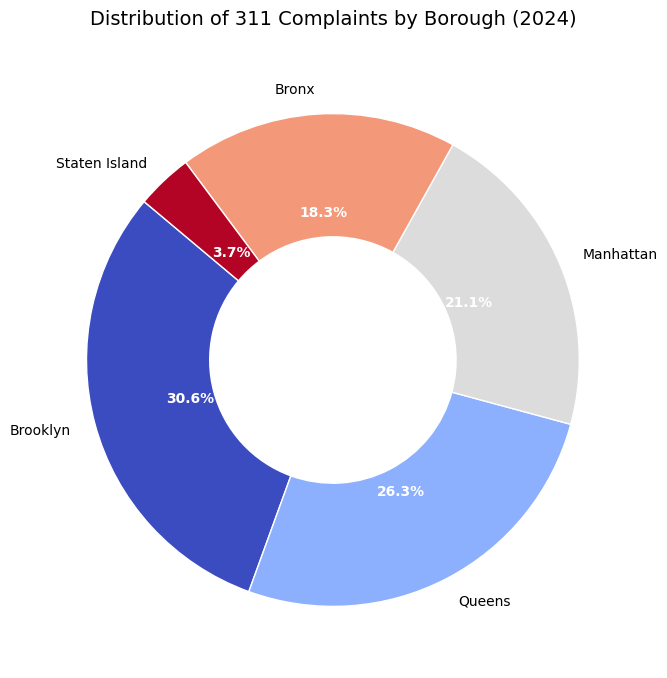

In [16]:
import matplotlib.pyplot as plt

# Count complaints by Borough
borough_counts = df['Borough'].value_counts()

# Define colors (optional)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(borough_counts)))

# Create a pie (donut) chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    borough_counts,
    labels=borough_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.5, 'edgecolor': 'white'}  
)

# Add title and styling
plt.setp(autotexts, size=10, weight='bold', color='white')
plt.title('Distribution of 311 Complaints by Borough (2024)', fontsize=14, pad=20)

plt.show()

Because in New York, filing a 311 report is basically a love language.
**Brooklyn** takes the crown with ~31% of all complaints — the most people, and apparently the most opinions.
**Queens** is right behind at ~26% — between the airports, traffic, and… more traffic, they’ve got plenty to report.
**Manhattan** logs ~21% — tourists blocking the sidewalk alone could fill a database.
The **Bronx** comes in at 18% — clearly unafraid to let the city know what’s up.
And **Staten Island** at ~4% — fewer complaints, maybe because they’re too busy waiting for the ferry.  
So, the trend is pretty clear: 
**More people = more complaining.
And honestly? That feels very New York.”**

### What are the New Yorkers Complaining about?
Let’s understand the *nature* of complaints. Which issues push New Yorkers to pick up the phone? We’ll look at the top complaint types and see if some issues dominate the city.


In [20]:
df['Complaint Type'].value_counts().nlargest(20)

Complaint Type
Illegal Parking                  474584
Noise - Residential              363098
Blocked Driveway                 159244
Noise - Street/Sidewalk          159162
Abandoned Vehicle                 65385
Noise - Commercial                65244
Water System                      62318
Dirty Condition                   56139
Noise                             52192
Street Condition                  49045
Noise - Vehicle                   46655
Derelict Vehicles                 42275
Rodent                            37559
Encampment                        37410
Traffic Signal Condition          37332
Illegal Dumping                   36565
General Construction/Plumbing     34466
Missed Collection                 31631
Homeless Person Assistance        30226
Noise - Helicopter                27090
Name: count, dtype: int64

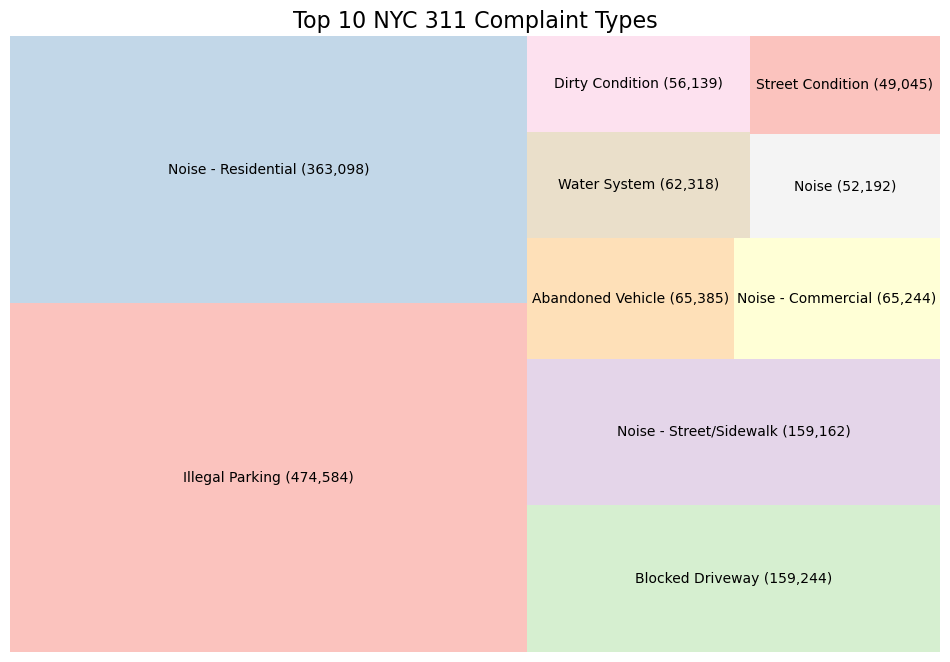

In [21]:
import squarify 

# Top 10 Complaints Type
top10 = df['Complaint Type'].value_counts().nlargest(10)

# Create labels
label = [f"{i} ({v:,})" for i, v in zip(top10.index, top10.values)]

# plot 
plt.figure(figsize=(12,8))
squarify.plot(
sizes = top10.values,
label = label,
alpha = 0.8,
color = plt.cm.Pastel1.colors
)
plt.title("Top 10 NYC 311 Complaint Types", fontsize=16)
plt.axis('off')
plt.show()

Well… mostly parking and noise.
**Illegal Parking** tops the list with nearly half a million reports.
Because if there’s one thing New Yorkers protect fiercely — it’s their driveway and that tiny sliver of curb they may or may not own.  
Next: **Noise — Residential**, with 360K+ complaints.
Thin walls, loud neighbors, music battles — you name it, someone has reported it.  
Then we see **Blocked Driveways** and **Noise on the Street/Sidewalk**, each with over 150K reports.
Basically, if it honks, blasts music, or parks where it shouldn’t… it’s on 311.  
**Abandoned Vehicles**? Over 65K reports.
Because apparently some cars also decide to move to New York and never leave.  
**Commercial Noise** and **general Noise** follow closely — proving that quiet in NYC is more of an urban myth.  
We also see concerns like **Water System** issues and **Dirty Conditions** — reminding us that 311 isn’t just for petty frustrations; it also helps keep essential services working.  
So the big takeaway?
New Yorkers love their peace and parking — and they’re not afraid to complain to protect it.”

### Top 311 Complaints by Borough

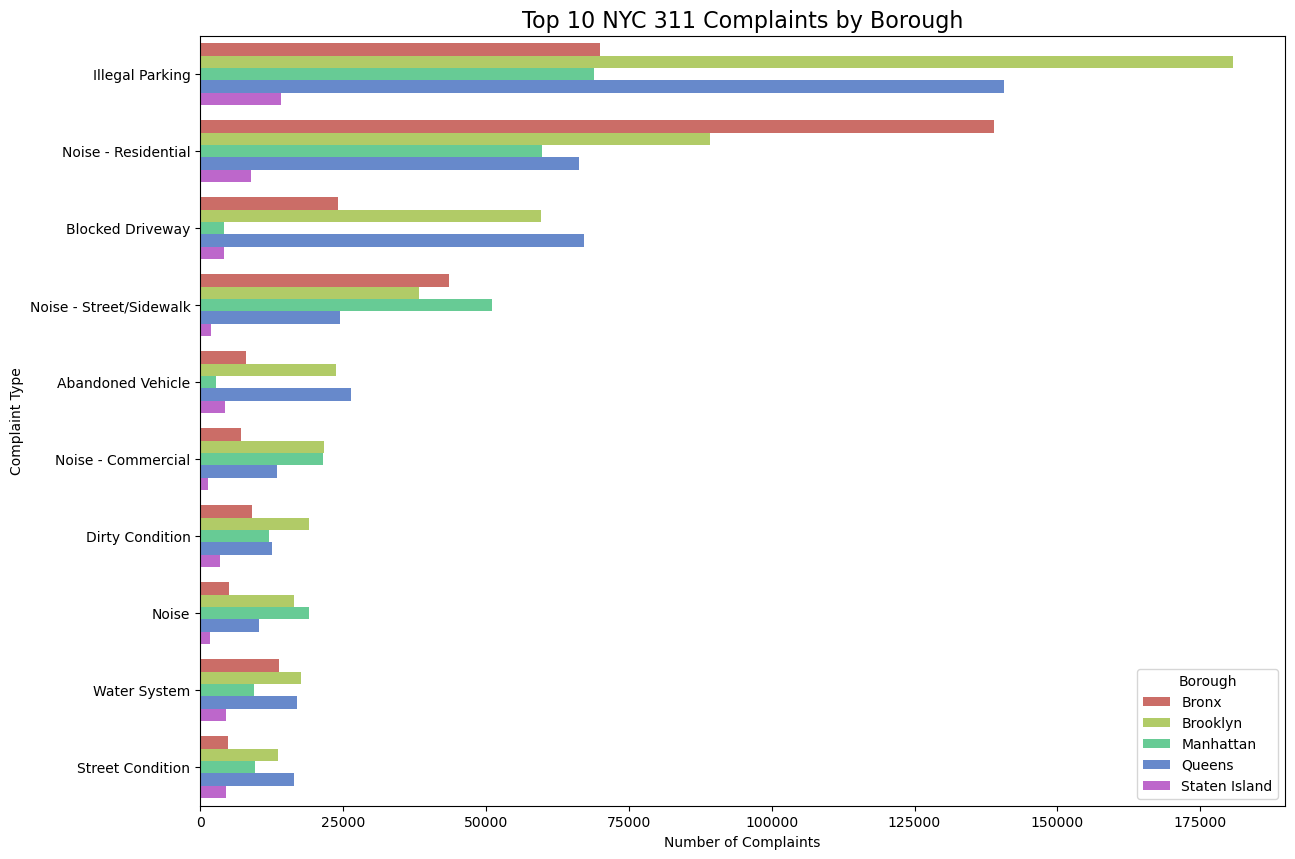

In [26]:
import seaborn as sns

# convert to string and strip spaces 
df['Complaint Type'] = df['Complaint Type'].astype(str).str.strip()

# Top 10 comlaints city wide
top10 = df['Complaint Type'].value_counts().nlargest(10).index.tolist()

# Filter dataset
filtered = df[df['Complaint Type'].isin(top10)]
filtered['Complaint type'] = filtered['Complaint Type'].astype(str)

# Aggregate counts by Complaint type
agg = (filtered.groupby(['Complaint Type', 'Borough'], observed=True).size().reset_index(name='count'))
agg = agg.sort_values('count', ascending = False)
       
# plot
plt.figure(figsize=(14,10))
sns.barplot(data= agg,
            x= 'count',   
            y='Complaint Type',
               hue = 'Borough', 
            palette = 'hls',
            width=0.8
             )
plt.title("Top 10 NYC 311 Complaints by Borough", fontsize=16)
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Type")

plt.show()

So here’s the borough gossip in 311 numbers:  
**Queens** and **Brooklyn** dominate almost every complaint type — they just can’t help themselves.
The **Bronx** takes the crown for **Residential Noise** — clearly, someone’s always throwing a party.
**Manhattan** leads in **Noise** on the **Street/Sidewalk** — construction, traffic, and maybe a rogue street performer or two.

### The Complaint Map: Who’s Talking, and Where?
Now let’s zoom in from boroughs to a finer view — the ZIP code level

In [45]:
# Remove missing ZIPs and Boroughs
df_clean = df[df['Incident Zip'].notna() & df['Borough'].notna()]

# Count complaints per ZIP code and borough
zip_counts = (
    df_clean.groupby(['Incident Zip', 'Borough'])
    .size()
    .reset_index(name='Count')
)

# Sort descending and take top 20
top20_zips = zip_counts.sort_values(by='Count', ascending=False).head(20)


/var/folders/f3/hdbg9f_j0cn761_jtcpg4pkr0000gn/T/ipykernel_1335/3348953700.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(['Incident Zip', 'Borough'])


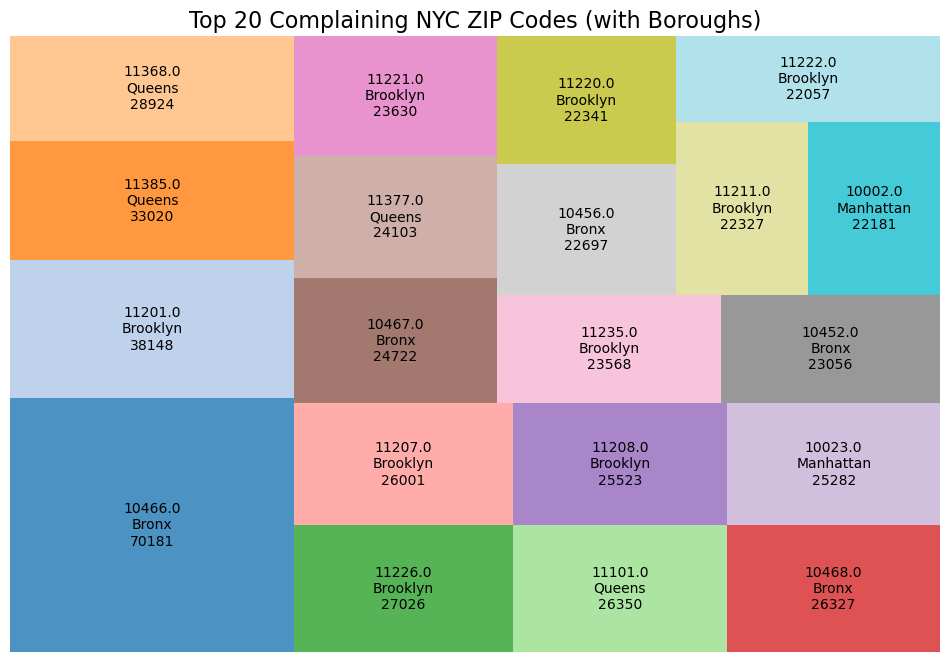

In [43]:
# Create labels combining ZIP, Borough, and Count
top20_zips['label'] = top20_zips.apply(
    lambda x: f"{x['Incident Zip']}\n{x['Borough']}\n{x['Count']}", axis=1
)
plt.figure(figsize=(12,8))
squarify.plot(
    sizes=top20_zips['Count'],  # size proportional to number of complaints
    label=top20_zips['label'],  # labels for each rectangle
    alpha=0.8,
    color=sns.color_palette("tab20", len(top20_zips))  
)

plt.axis('off')  # remove axes
plt.title('Top 20 Complaining NYC ZIP Codes (with Boroughs)', fontsize=16)
plt.show()


The **Bronx** dominates the top spot, with **ZIP 10466** racking up over **70,000** complaints — clearly, peace and quiet is hard to come by there.
**Brooklyn** and **Queens** follow closely, with multiple ZIP codes reporting 20–38K complaints each.
**Manhattan** makes a cameo with a couple of high-activity ZIPs, but most of the city’s 311 volume comes from Brooklyn, Queens, and the Bronx.
These numbers show us hotspots of activity, highlighting neighborhoods that drive the majority of complaints.
Put simply: if you live in these ZIP codes, the 311 line is working overtime — and residents definitely aren’t shy about using it!”

In [38]:
import pandas as pd

# Count complaints per ZIP
zip_counts = df.groupby('Incident Zip').size().reset_index(name='Count')

# Remove missing ZIPs
zip_counts = zip_counts[zip_counts['Incident Zip'].notna()]

# Take mean lat/lon for each ZIP
zip_coords = df.groupby('Incident Zip')[['Latitude', 'Longitude']].mean().reset_index()

# Merge counts with coordinates
zip_plot = pd.merge(zip_counts, zip_coords, on='Incident Zip')


/var/folders/f3/hdbg9f_j0cn761_jtcpg4pkr0000gn/T/ipykernel_1335/2628815318.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zip_counts = df.groupby('Incident Zip').size().reset_index(name='Count')
/var/folders/f3/hdbg9f_j0cn761_jtcpg4pkr0000gn/T/ipykernel_1335/2628815318.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zip_coords = df.groupby('Incident Zip')[['Latitude', 'Longitude']].mean().reset_index()


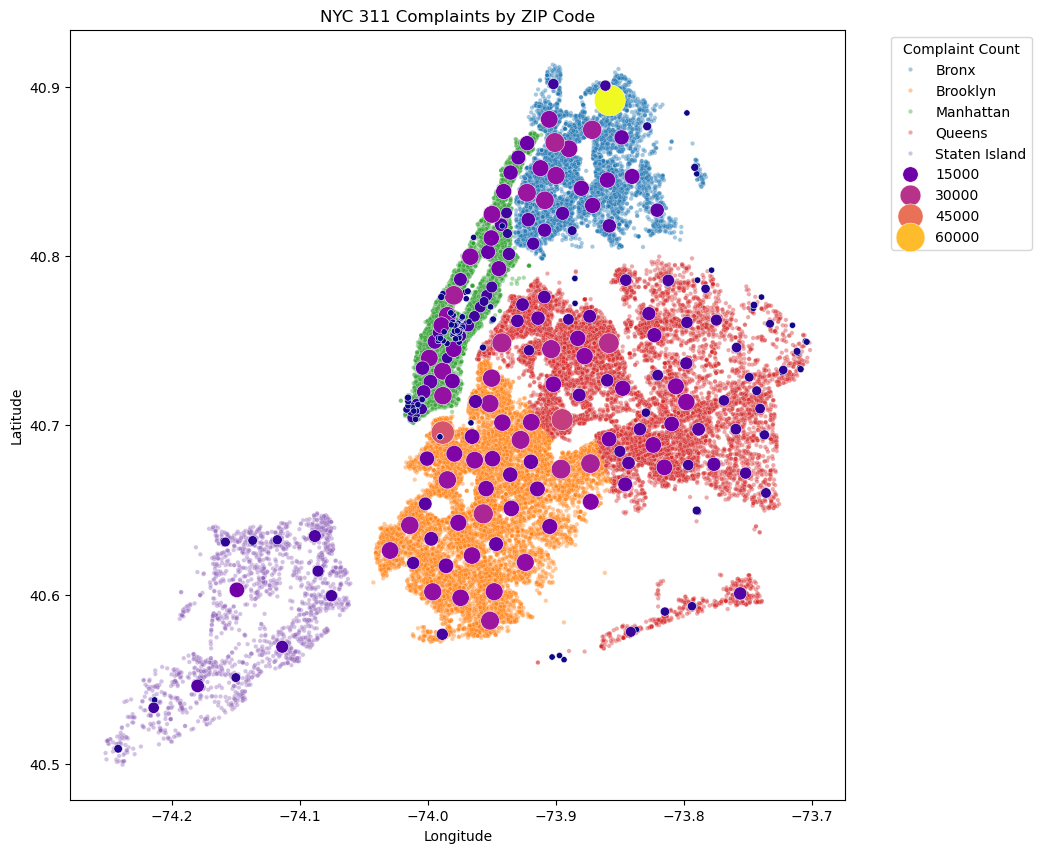

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Borough', data=df.sample(50000), alpha=0.4, s=10)
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    size='Count',          # bubble size proportional to complaints
    sizes=(20, 500),       # min/max bubble size
    hue='Count',
    palette = 'plasma',
    # optional: color by count
    data=zip_plot,
    alpha=1
)

plt.title('NYC 311 Complaints by ZIP Code')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Complaint Count', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


See that big yellow bubble? That’s Bronx ZIP 10466 — over 70,000 complaints! Clearly, someone in the Bronx isn't having a quiet day.  
Basically: **The bigger the bubble, the louder the neighborhood**.

### Hourly Drama: When NYC Loves to Complain
Because in this city, someone is always annoyed.
Some boroughs wake up cranky, others stay cranky — and 311 hears about every hour of it.

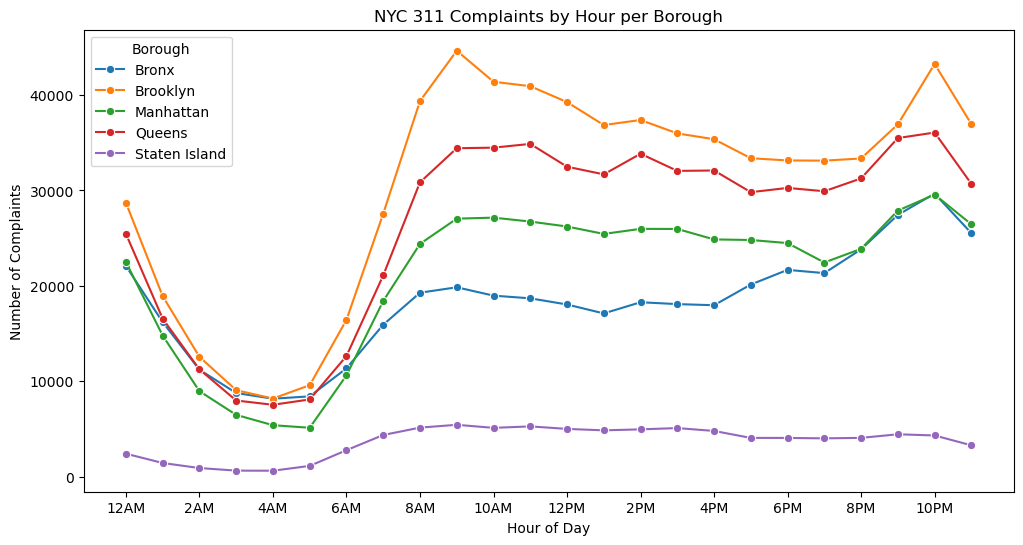

In [55]:
# Count complaints by hour
hour_borough = df.groupby(['Hour','Borough'], observed=True).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=hour_borough, x='Hour', y='Count', hue='Borough', marker='o')

# Custom x-axis labels: convert 0–23 to 12AM–11PM
time_labels = [
    '12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM',
    '12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM'
]
plt.xticks(ticks=range(0,24,2), labels=[time_labels[i] for i in range(0,24,2)])
plt.title('NYC 311 Complaints by Hour per Borough')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Complaints')
plt.show()

NYC doesn’t wait for sunrise to start venting. Complaints come in **hot at midnight**, taper off while most people pretend to sleep, and then **skyrocket at 9 AM** — just in time for work, traffic, and general chaos. Things chill a bit in the evening… until **10 PM** hits, and everyone suddenly remembers they have neighbors, noise, and zero patience.

In [52]:
# Label Day vs Night

def day_night(hour):
    if 6 <= hour < 18:
        return 'Day (6am-6pm)'
    else:
        return 'Night (6pm-6am)'

df['Day_Night'] = df['Hour'].apply(day_night)

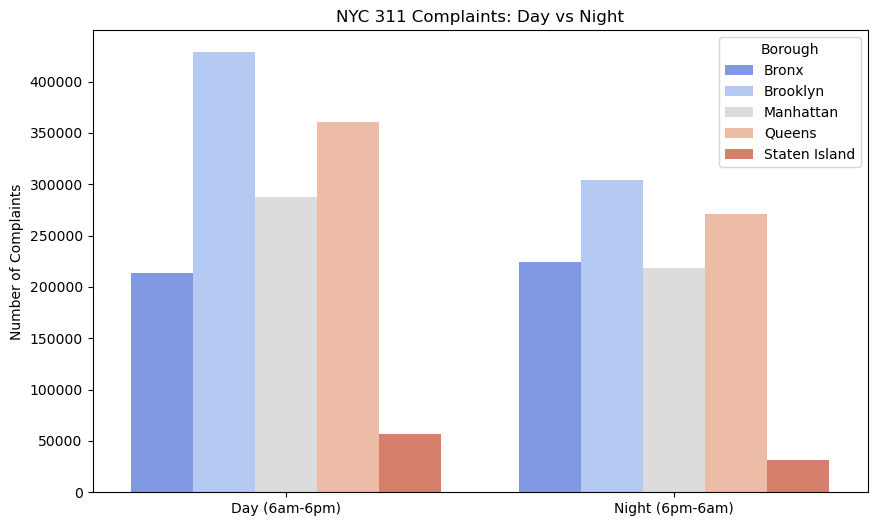

In [54]:
# Compare Day vs Night
day_night_counts = df.groupby(['Day_Night', 'Borough'], observed=True).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=day_night_counts, x='Day_Night', y='Count',hue='Borough', palette='coolwarm')
plt.title('NYC 311 Complaints: Day vs Night')
plt.xlabel('')
plt.ylabel('Number of Complaints')
plt.show()

More complaints happen while the sun’s out — because nothing says good morning like calling 311 before your second coffee. Nighttime still brings drama, but the day shift remains the reigning champion of grievances.

### Weekend Warriors: Residential Noise Peaks on the Weekend

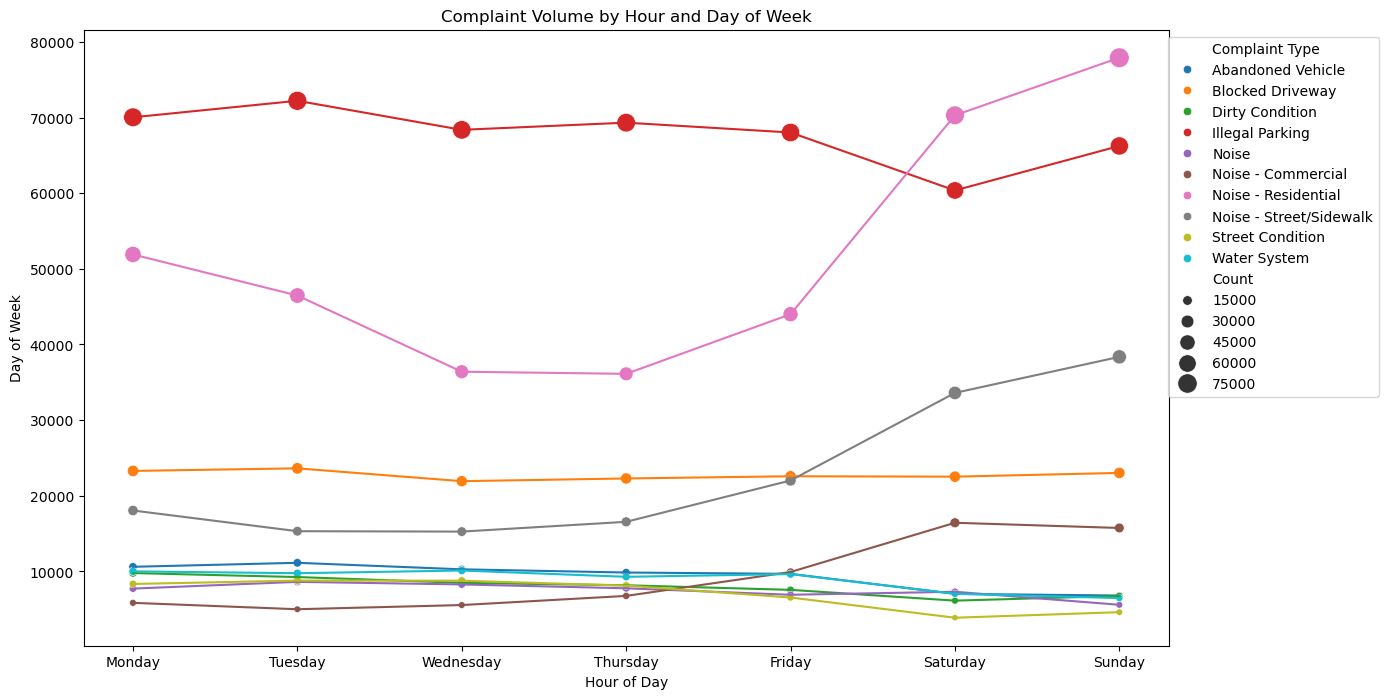

In [61]:
# Complints by week
top10_complaints = df['Complaint Type'].value_counts().nlargest(10).index
filtered_complaints = df[df['Complaint Type'].isin(top10_complaints)]

# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_trend = filtered_complaints.groupby(['DayOfWeek','Complaint Type'], observed=True).size().reset_index(name='Count')

# Convert DayOfWeek to ordered category
weekly_trend['DayOfWeek'] = pd.Categorical(
    weekly_trend['DayOfWeek'],
    categories=weekday_order,
    ordered=True
)
    
plt.figure(figsize=(14,8))

sns.scatterplot(
    data=weekly_trend,
    x='DayOfWeek',
    y='Count',
    hue='Complaint Type',
    size='Count',
    sizes=(20, 200)
)
sns.lineplot(
    data=weekly_trend,
    x='DayOfWeek',
    y='Count',
    hue='Complaint Type',
    legend=False  # prevent duplicate legend entries
)
plt.title('Complaint Volume by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.legend(bbox_to_anchor=(1.20,1.00), loc='upper right')
plt.show()

Most complaints stay pretty steady across the week — New Yorkers are reliable in their grievances.
But **Residential Noise**? That one clearly waits for the weekend. Saturday and Sunday spikes suggest neighbors love to party, grill, or just make life loud when everyone’s off work.
Apparently, some residents save their best noise for the days we’re supposed to relax — and 311 is here to record every decibel!

### Where the Action Happens: Streets vs. Buildings

In [ ]:
df["Location Type"].value_counts().nlargest(20)

/var/folders/f3/hdbg9f_j0cn761_jtcpg4pkr0000gn/T/ipykernel_1335/502200900.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20_loc,


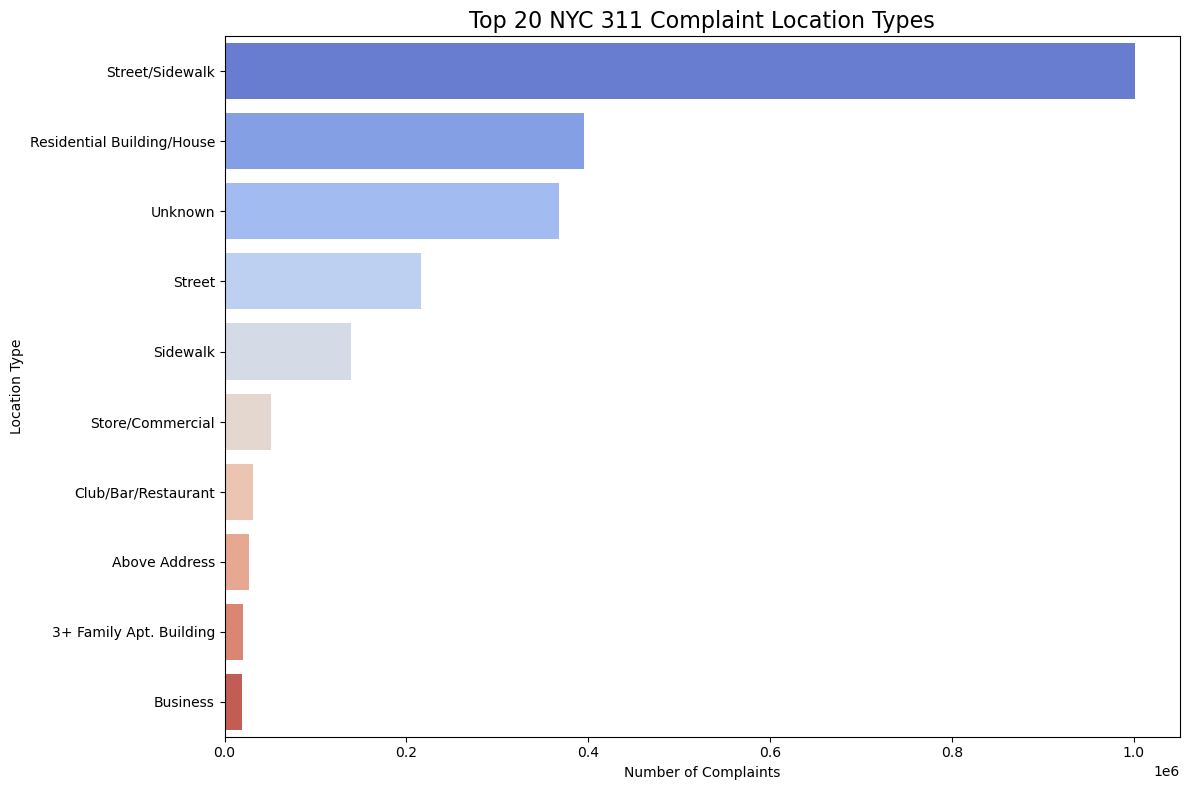

In [59]:
top20_loc = df['Location Type'].value_counts().nlargest(10).reset_index()
top20_loc.columns=['Location Type','Count']

plt.figure(figsize=(12,8))
sns.barplot(data=top20_loc,
           x='Count',
           y='Location Type',
           palette='coolwarm'
           )
plt.title('Top 20 NYC 311 Complaint Location Types', fontsize=16)
plt.xlabel('Number of Complaints')
plt.ylabel('Location Type')
plt.tight_layout()
plt.show()

When it comes to complaints, the **streets and sidewalks** are clearly stealing the spotlight — more calls than any other location type. Residential buildings follow closely, but still lag behind.
Basically, if you live or work along a busy street in NYC, you’re more likely to report a problem than if you’re behind four walls. The city’s sidewalks seem to have more drama than most apartments!

### The City’s Greatest Hits… of Complaints 

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Descriptor'].dropna())

nmf = NMF(n_components=5, random_state=42)
nmf_topics = nmf.fit_transform(X)

for i, topic in enumerate(nmf.components_):
    print(f"Topic {i+1}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topic 1:
['boat', 'nr10', 'horn', 'television', 'truck', 'car', 'talking', 'music', 'loud', 'party']
Topic 2:
['wa4', 'wc3', 'construction', 'running', 'bike', 'lane', 'crosswalk', 'sidewalk', 'hydrant', 'blocked']
Topic 3:
['request', 'paper', 'plates', 'trash', 'obscured', 'plate', 'license', 'unknown', 'partial', 'access']
Topic 4:
['use', 'permit', 'improper', 'sidewalk', 'commercial', 'overnight', 'posted', 'sign', 'parking', 'violation']
Topic 5:
['derelict', 'vehicles', 'recycling', 'obscured', 'trash', 'plate', 'license', 'unknown', 'banging', 'pounding']


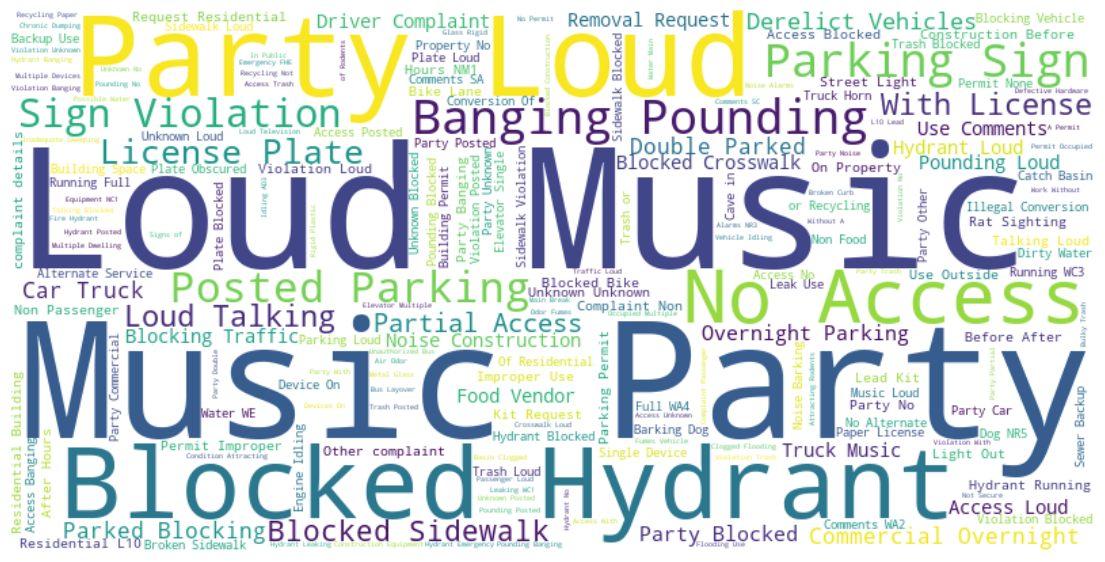

In [57]:
from wordcloud import WordCloud

text = " ".join(df['Descriptor'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set()).generate(text)

plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Bigram / Trigram analysis

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,3), stop_words='english')
X = vectorizer.fit_transform(df['Descriptor'].dropna())
counts = X.sum(axis=0)
words = vectorizer.get_feature_names_out()
top_phrases = sorted(zip(words, counts.tolist()[0]), key=lambda x: x[1], reverse=True)[:20]
print(top_phrases)


[('loud music', 411176), ('loud music party', 411176), ('music party', 411176), ('blocked hydrant', 125240), ('banging pounding', 112513), ('parking sign', 112001), ('parking sign violation', 112001), ('posted parking', 112001), ('posted parking sign', 112001), ('sign violation', 112001), ('license plate', 77449), ('loud talking', 66262), ('blocked sidewalk', 57993), ('partial access', 45823), ('derelict vehicles', 42275), ('double parked', 38338), ('double parked blocking', 38338), ('parked blocking', 38338), ('car truck', 38323), ('commercial overnight', 37858)]


**Loud music, parking violations, blocked hydrants**… these are the ‘greatest hits’ that keep 311 operators busy day after day.  
The word cloud shows exactly what makes New Yorkers pick up the phone and report a problem — anything that messes with peace, space, or a parking spot.  
Basically, if it annoys someone in the city, it’s in the top charts, and 311 is there to record every note. NYC residents don’t hold back — they’re vocal, persistent, and sometimes a little dramatic!

## Wrapping Up the Noise

Our deep dive into NYC 311 complaints revealed a **city that never sleeps — but Copmlains a Lot**. From borough to ZIP code, the patterns show who’s loudest, when they’re most vocal, and what annoys them the most.  

Key takeaways:  

**Borough hotspots**: Brooklyn and Queens dominate most complaint types, while the Bronx leads in residential noise.  
**Geographical patterns**: Certain ZIP codes, like Bronx 10466, clearly stand out as 311 superstars — the city’s loudest neighborhoods.  
**Temporal trends**: Complaints spike at midnight, peak at 9 AM, and stay high well into the night. Weekends bring extra drama, especially for residential noise.  
**Complaint types & locations**: Streets, sidewalks, and loud music parties are the main culprits, with parking, blocked hydrants, and noise complaints filling the rest of the top spots.  
**Keywords**: Word clouds confirm NYC residents don’t hold back — noise, obstruction, and parking issues are perennial sources of irritation.  

Overall, this analysis gives us a 360° view of what drives 311 calls, helping city services understand when, where, and why New Yorkers complain. It’s a story of a bustling city, passionate residents, and the heartbeat of NYC as told through its complaints.”